# **Experiment Notebook**



In [2]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [3]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [5]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## C. Data Understanding

### C.1   Load Datasets


In [8]:
from pathlib import Path
file_path = Path.home() / "Desktop" / "36120" / "Assignment2"

X_train = pd.read_csv(file_path / "X_train.csv")
X_val = pd.read_csv(file_path / "X_val.csv")
X_test = pd.read_csv(file_path / "X_test.csv")
y_train = pd.read_csv(file_path / "y_train.csv").squeeze()
y_val = pd.read_csv(file_path / "y_val.csv").squeeze()
y_test = pd.read_csv(file_path / "y_test.csv").squeeze()

---
## D. Feature Selection

### D.1 Approach "Feature Importance"

In [9]:
X_train.columns

Index(['relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_max',
       'cloud_cover_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean',
       'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
       'pressure_msl_mean', 'vapour_pressure_deficit_max',
       'shortwave_radiation_sum', 'precipitation_hours', 'temperature_2m_mean',
       'wind_gusts_10m_max', 'wind_speed_10m_max',
       'et0_fao_evapotranspiration', 'temperature_range', 'pressure_range',
       'wind_direction_sin', 'wind_direction_cos', 'rain_occurred',
       'rain_occurred_lag_1', 'rain_occurred_lag_2', 'rain_occurred_lag_3',
       'weather_code_0.0', 'weather_code_1.0', 'weather_code_2.0',
       'weather_code_3.0', 'weather_code_51.0', 'weather_code_53.0',
       'weather_code_55.0', 'weather_code_61.0', 'weather_code_63.0',
       'weather_code_65.0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],

In [10]:
selected_features = ['relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_max',
       'cloud_cover_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean',
       'dew_point_2m_mean', 'wet_bulb_temperature_2m_mean',
       'pressure_msl_mean', 'vapour_pressure_deficit_max',
       'shortwave_radiation_sum', 'precipitation_hours', 'temperature_2m_mean',
       'wind_gusts_10m_max', 'wind_speed_10m_max',
       'et0_fao_evapotranspiration', 'temperature_range', 'pressure_range',
       'wind_direction_sin', 'wind_direction_cos', 'rain_occurred',
       'rain_occurred_lag_1', 'rain_occurred_lag_2', 'rain_occurred_lag_3']

X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

In [15]:
feature_selection_1_insights = """From the previous experiments, month and weather code features show little predictive value and are therefore removed to simplify the model and reduce noise.""" 

In [16]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [18]:
# Critical Success Index (CSI)
def critical_success_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    csi = tp / (tp + fp + fn)
    return csi

In [19]:
performance_metrics_explanations = """Accuracy measures how well the model correctly predicts both rain and no-rain cases, providing an overall view of performance. However, due to the dataset’s imbalance, precision, recall, and F1-score offer more meaningful insights. In this project, the F1-score is the primary metric because it balances precision and recall, which is essential when both false positives and false negatives have significant impacts. The confusion matrix further breaks down prediction results into true positives, true negatives, false positives, and false negatives, giving a clearer picture of the model’s strengths and weaknesses. Additionally, the Critical Success Index (CSI) is introduced to assess forecast skill specifically in meteorological contexts. Together, these metrics provide a comprehensive evaluation of model effectiveness."""

In [20]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null hypothesis: The performance of this Logistic Regression model is not significantly better than that of the baseline Logistic Regression model.

Alternative hypothesis: This Logistic Regression model demonstrates statistically significant improvement in performance compared to the baseline Logistic Regression model.

### J.1 Import Algorithm

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
algorithm_selection_explanations = """Logistic Regression serves as an effective baseline model for predicting rainfall occurrence due to its simplicity and interpretability. Additionally, it trains quickly and requires minimal computational resources, making it ideal for initial experimentation and a strong baseline. Establishing this baseline helps set a performance standard that more complex models must exceed, ensuring that further model development delivers meaningful improvements."""

In [23]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [38]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [39]:
# Define parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Required for l1 penalty
    'class_weight': [
        'balanced',                   
        {0: 1.0, 1: 2.0},            
        {0: 1.0, 1: 2.38},            
    ]
}

In [40]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=34, max_iter=2000),
    param_grid=param_grid,
    cv=tscv,
    scoring='f1', 
    n_jobs=-1,     
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Best parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1 score: 0.4465


In [27]:
hyperparameters_selection_explanations = """The hyperparameters C, penalty and class_weight are tuned to optimise the logistic regression model for an imbalanced dataset. The parameter C controls the strength of regularisation, where smaller values impose stronger regularisation to reduce overfitting, and larger values allow the model to capture more complex patterns. There are two types of penalty: L1 and L2. L1 regularisation shrinks less important feature coefficients to zero, effectively performing feature selection, while L2 regularisation reduces coefficients without eliminating them. Given the dataset’s imbalance, adjusting class_weight helps assign greater importance to the minority class, improving the model’s ability to predict rare rain events."""

In [28]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [41]:
best_model = grid_search.best_estimator_

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [42]:
# Predictions on validation dataset
y_val_pred = best_model.predict(X_val)

In [43]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
csi_score = critical_success_index(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Accuracy: 0.61
Precision: 0.43
Recall: 0.69
F1 Score: 0.53
Critical Success Index (CSI): 0.36

Confusion Matrix:
[[140 107]
 [ 37  81]]


In [44]:
# Predictions on testing dataset
y_test_pred = best_model.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
csi_score = critical_success_index(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Critical Success Index (CSI): {csi_score:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.52
Precision: 0.40
Recall: 0.67
F1 Score: 0.50
Critical Success Index (CSI): 0.33

Confusion Matrix:
[[ 98 131]
 [ 42  87]]


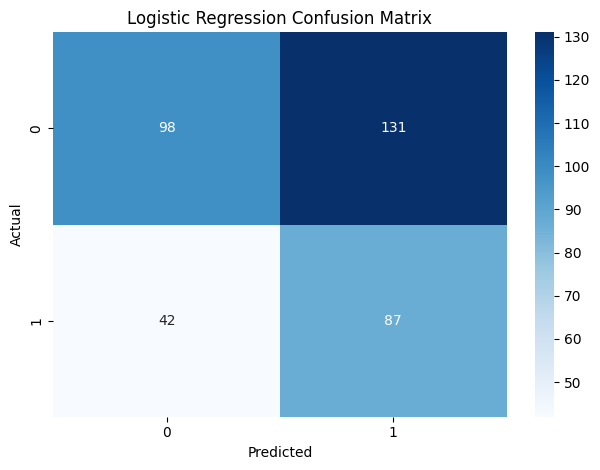

In [46]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
model_performance_explanations = """With logistic regression, the issue of overfitting appears to be minor. The accuracy decreases from 0.61 on the validation dataset to 0.52 on the test dataset, which can be attributed to the class imbalance present in the dataset. However, the F1 scores remain relatively stable at 0.53 for validation and 0.50 for testing, indicating consistent performance across datasets. The model achieves a recall of 0.67 and a precision of 0.40. The relatively high recall suggests that the model is effective in identifying most rain events, which is important for the business objective. However, this comes at the expense of lower precision, as a significant number of non-rain days are incorrectly classified as rain. This trade-off reflects the common challenge of balancing false positives and false negatives, particularly when dealing with imbalanced datasets."""

In [50]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [51]:
business_impacts_explanations = """The model demonstrates strong recall but relatively low precision, indicating that it successfully identifies most rain events but also predicts rain when it does not occur. While this may lead to unnecessary precautions and increased operational costs due to false positives, the consequences of false negatives, failing to predict actual rain, are more severe. These can include safety hazards, service disruptions, or financial losses. Therefore, prioritising recall is justified and aligns with the overarching business objective of ensuring adequate preparedness for adverse weather conditions."""

In [52]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [53]:
experiment_outcome = """Null Hypothesis Rejected"""

In [54]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [56]:
experiment_results_explanations = """The null hypothesis is rejected, as this model outperforms the baseline logistic regression model, although the improvement is minimal. While recall and F1 score are better than those achieved by the Random Forest and XGBoost models, the low precision remains a significant concern, as it can lead to inconvenience and unnecessary costs for stakeholders. Given the limited performance gains and persistent issues such as high false positive rates and some false negatives, this project is considered a dead end in its current form. To achieve meaningful improvement, more advanced weather-related models should be explored, alongside domain-specific feature engineering informed by relevant research. Due to its inability to reliably balance precision and recall, this model is not suitable for production deployment, as it poses the risk of both missed rain events and frequent false alarms, which could have serious consequences for stakeholders.
"""

In [57]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)